In [1]:
import warnings as wr
wr.filterwarnings ('ignore')

from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

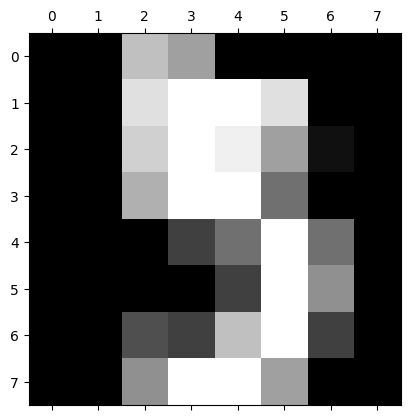

In [4]:
plt.gray()
plt.matshow(digits.images[5])

<Figure size 640x480 with 0 Axes>

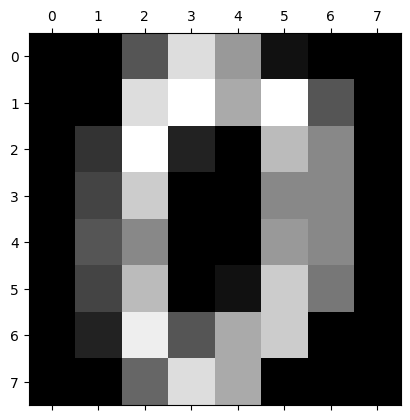

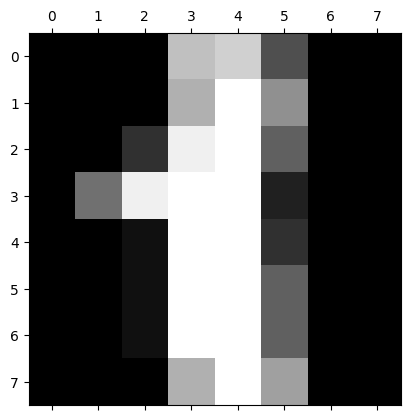

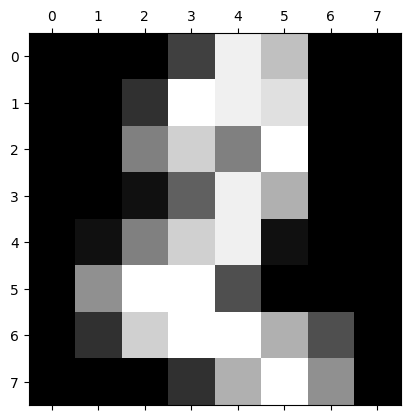

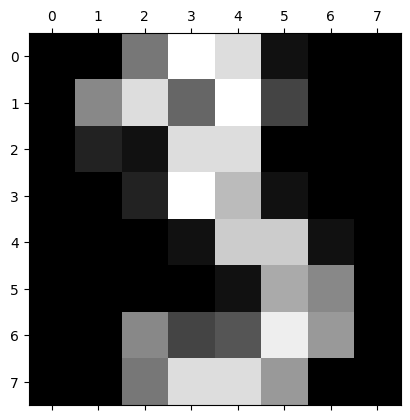

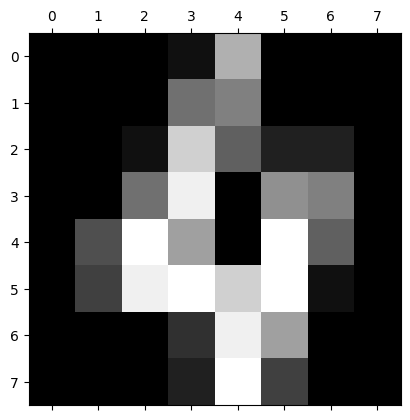

In [5]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [6]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
X_train, X_test, y_train, y_test = tts(digits.data, digits.target, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
model.score(X_test, y_test)

0.9694444444444444

In [12]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Confusion Matrix

In [13]:
y_predicted = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

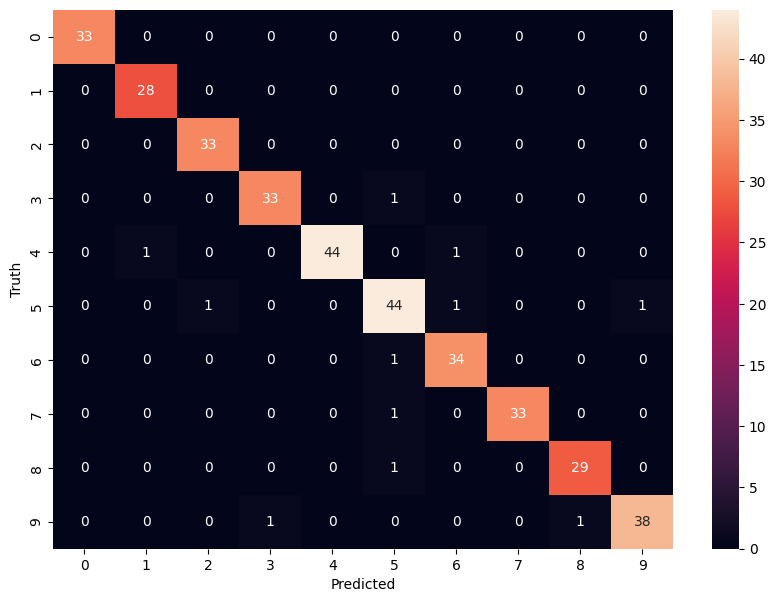

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Try with Iris Dataset

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df['target'] = iris.target

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [19]:
X = df.drop('target', axis = 1)
y = df[['target']]

#### Scaling 

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max scaling to your features
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
model2 = LogisticRegression()

In [23]:
model2.fit(X_train, y_train)

LogisticRegression()

In [24]:
model2.score(X_test, y_test)

0.9666666666666667

In [25]:
y_pred = model2.predict(X_test)

In [26]:
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

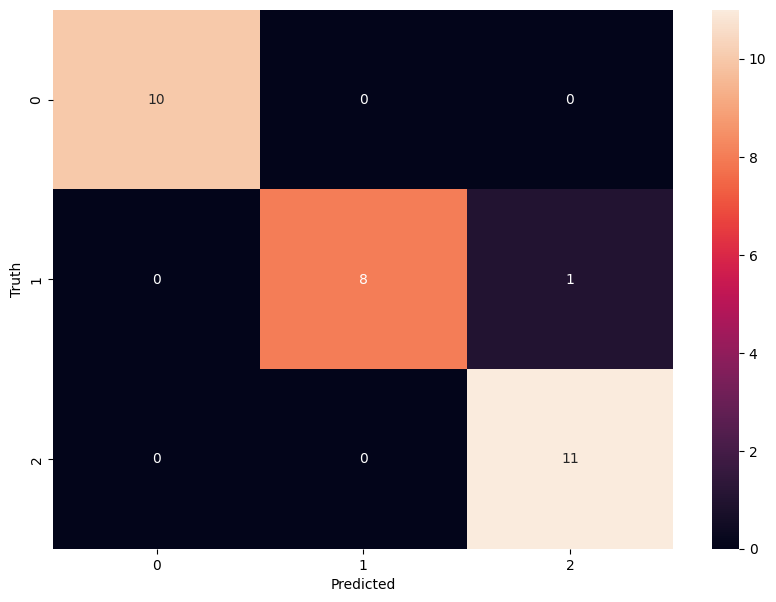

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')